# ML PROJECT 1

## Getting the Dataset and Visualising It

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
housing = pd.read_csv("cal_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Plotting the Distributions

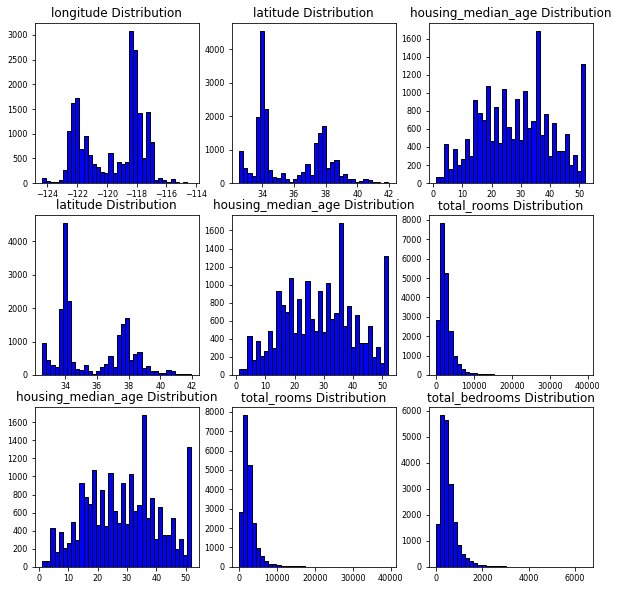

In [5]:
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8)
plt.rcParams["figure.figsize"]=(10, 10)

def histPlotter(X, a, b):
    figure, axis = plt.subplots(a, b)
    for i in range(a):
        for j in range(b):
            axis[i, j].hist(housing[X[i + j]], color="blue", edgecolor= "black", bins=36)
            axis[i, j].set_title(X[i + j] + " Distribution")
newList = []
for column in housing:
    newList.append(column)

histPlotter(newList, 3, 3)
plt.show()


### Our dataset has some missing values in it. Lets check which ones are missing, refill them and then test if we managed to do so...

In [7]:
print(housing[housing.isnull().any(axis=1)]) # We can see that total_bedrooms column has missing values.

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  media

### IterativeImputer

In [24]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as II

listVer = housing.iloc

print(housing.loc[290]["total_bedrooms"])
print(housing.loc[341]["total_bedrooms"])
print(housing.loc[538]["total_bedrooms"]) # We can see that these cells are NaN

imputer = II(random_state= 42)
imputed = imputer.fit_transform(housing[housing.columns[:9]])
df_imputed = pd.DataFrame(imputed, columns= housing.columns[:9])
#df_imputed[housing.columns[-1]] = housing[housing.columns[-1]]

print(df_imputed.loc[290]["total_bedrooms"]) # Now we can see that these cells have the mean
print(df_imputed.loc[341]["total_bedrooms"]) # of the total_bedrooms columns' values.
print(df_imputed.loc[538]["total_bedrooms"]) # We have successfully filled the missing cells with SimpleImputer

nan
nan
nan
207.59777113818882
275.4177992563316
1280.669706425319


### Now create a model over median_house_value column.

### At first i check the correlation relation that is furthest from zero. (Close to 1 = Linear
### Close to -1 = Negative Linear)

### After that i one-hot encode the string column and then use StandardScaler over int columns. Then check the correlation again to see if there are any differences.

In [7]:
df = housing[housing.columns[:9]].corr()
highest_correlation = 0
rowNum = 0
for row in range(df.shape[0]):
    if abs(df.iloc[row]["median_house_value"]) >= highest_correlation and df.iloc[row]["median_house_value"] < 1:
        highest_correlation = df.iloc[row]["median_house_value"]
        rowNum = row
        
print(rowNum)
print(highest_correlation)

# This loops through the correlations table of our dependent feature.


7
0.6880752079585577


In [13]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
feature_array = ohe.fit_transform(housing[["ocean_proximity"]]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
encoded_columns = pd.DataFrame(feature_array, columns = feature_labels)

encoded_columns

# One-Hot Encoding the categorical feature


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_imputed_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns = housing.columns[:9])

df_imputed_scaled

# Scaling integer data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.970982,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.348966,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.826134,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719278,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.389214,-0.512592,-0.443449,-1.216128,-1.115804
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.921116,-0.944405,-1.008420,-0.691593,-1.124470
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125637,-0.369537,-0.174042,-1.142593,-0.992746
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.306104,-0.604429,-0.393753,-1.054583,-1.058608


In [29]:
df = housing[housing.columns[:9]].corr()
highest_correlation = 0
rowNum = 0
for row in range(df.shape[0]):
    if abs(df.iloc[row]["median_house_value"]) >= highest_correlation and df.iloc[row]["median_house_value"] < 1:
        highest_correlation = df.iloc[row]["median_house_value"]
        rowNum = row
        
print(rowNum)
print(highest_correlation)

# Checking correlation again if there are any changes


7
0.6880752079585577


### Now Linear Regression

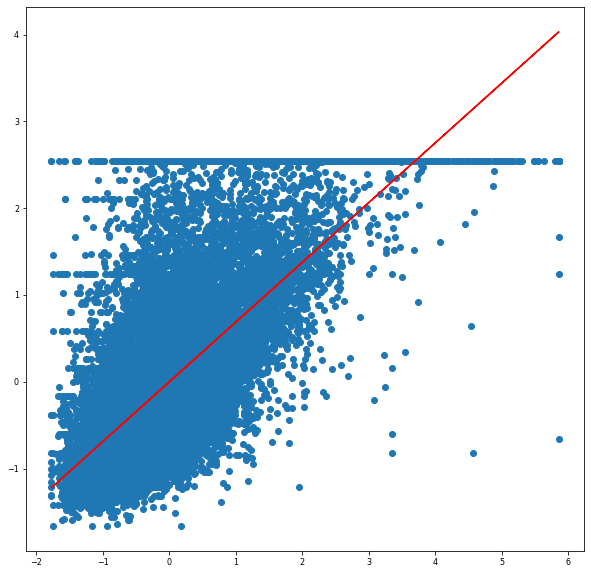

In [31]:
from sklearn.linear_model import LinearRegression

df_imputed_encoded_scaled = pd.concat([df_imputed_scaled, encoded_columns], axis=1)

# Concating encoded columns with scaled columns

X = df_imputed_encoded_scaled.iloc[:, rowNum].values.reshape(-1, 1)
Y = df_imputed_encoded_scaled[["median_house_value"]].values.reshape(-1, 1)
LR = LinearRegression()
LR.fit(X, Y)
Y_pred = LR.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color="r")
plt.show()